In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

## Data Preprocessing

- Đọc data
- Drop các giá trị NaN
- Chọn features và nhãn ứng với X và y
- Chuẩn hoá X
- One-hot y

In [2]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
# check NaN values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
data = data.dropna()
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# check number of unique values
data.nunique()

longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
median_house_value     3833
ocean_proximity           5
dtype: int64

In [6]:
# Etract the target variable
y = data['ocean_proximity'].to_numpy()
X = data.drop('ocean_proximity', axis=1).to_numpy()
print(X.shape, y.shape)

(20433, 9) (20433,)


In [7]:
y

array(['NEAR BAY', 'NEAR BAY', 'NEAR BAY', ..., 'INLAND', 'INLAND',
       'INLAND'], dtype=object)

### Normalize X

In [8]:
# Etract the target variable
y = data['ocean_proximity']
X = data.drop('ocean_proximity', axis=1)
print(X.shape, y.shape)

(20433, 9) (20433,)


In [9]:
X = np.array(X)

In [10]:
X = [(i - X.mean()) / X.std() for i in X]
X

[array([-0.313968  , -0.31184406, -0.31180267, -0.3006729 , -0.3106353 ,
        -0.30807506, -0.3106751 , -0.31223612,  5.69162703]),
 array([-0.31396787, -0.31184432, -0.31206798, -0.21817464, -0.29767489,
        -0.28049605, -0.2972504 , -0.31223643,  4.44334175]),
 array([-0.31396813, -0.31184446, -0.31165675, -0.29288604, -0.30982611,
        -0.30576686, -0.30999856, -0.31225028,  4.35844244]),
 array([-0.31396827, -0.31184446, -0.31165675, -0.29544629, -0.30922916,
        -0.3049444 , -0.30944141, -0.3122717 ,  4.21517484]),
 array([-0.31396827, -0.31184446, -0.31165675, -0.29076356, -0.30863221,
        -0.30485154, -0.30891079, -0.31229553,  4.22711381]),
 array([-0.31396827, -0.31184446, -0.31165675, -0.30015554, -0.309521  ,
        -0.3068679 , -0.30978631, -0.31229301,  3.26536373]),
 array([-0.31396827, -0.31184459, -0.31165675, -0.27871847, -0.30585972,
        -0.29783408, -0.30552808, -0.31229802,  3.65669652]),
 array([-0.31396827, -0.31184459, -0.31165675, -0.27117

In [11]:
X= np.array(X)

### One-hot encoding y

In [12]:
# one-hot y
y = pd.get_dummies(y)
y

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


## Spit data to train and test

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=211)

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(18389, 9) (18389, 5) (2044, 9) (2044, 5)


In [15]:
X.T.shape

(9, 20433)

## Build model

In [16]:
# # Code LASSO from scratch
# def lasso(X, y, alpha, iterations):
#     m, n = X.shape # m = number of samples, n = number of features
#     theta = np.zeros(n, y[1].shape()) # [0, 0, 0,.., 0] theta likes weights 1 * n
#     for i in range(iterations): # iterations = number of times to update the weights
#         y_pred = X.dot(theta) # nhân ma trận X với theta để ra được y_pred (tất nhiên ở vòng lặp đầu tiên thì theta = 0 nên y_pred = 0)
#         errors = y_pred - y # tính sai số giữa y_pred và y và errors có kích thuớc là m (số lượng mẫu) * 1
#         gradient = X.T @ errors / m # tính đạo hàm của hàm mất mát theo theta với X là ma trận dữ liệu, errors là sai số và m là số lượng mẫu với đầu ra là một ma trận n * 1
#         theta = theta - alpha * gradient
#     return theta

In [17]:
# lasso(X_train, y_train, 0.01, 1000)

## Training

In [18]:
# Train the model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [19]:
y_pred = lasso.predict(X_test)
y_pred

array([[3.91345194e-01, 4.47103152e-01, 2.71901680e-04, 1.12186633e-01,
        1.27467508e-01],
       [4.55695586e-01, 2.82765507e-01, 2.71901680e-04, 1.12186633e-01,
        1.27467508e-01],
       [3.75312503e-01, 4.88047343e-01, 2.71901680e-04, 1.12186633e-01,
        1.27467508e-01],
       ...,
       [3.76081193e-01, 4.86084265e-01, 2.71901680e-04, 1.12186633e-01,
        1.27467508e-01],
       [3.96671122e-01, 4.33501828e-01, 2.71901680e-04, 1.12186633e-01,
        1.27467508e-01],
       [4.75242292e-01, 2.32847246e-01, 2.71901680e-04, 1.12186633e-01,
        1.27467508e-01]])

## Convert y_pred to one hot

In [20]:
for i in range(y_pred.shape[0]):
    y_pred[i][y_pred[i] == max(y_pred[i])] = 1
    y_pred[i][y_pred[i] < max(y_pred[i])] = 0

In [22]:
y_pred

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

## Evaluate

In [28]:
# Calculate the accuracy
accuracy = sum((y_pred == y_test).sum() / y_test.size)
accuracy

0.8393346379647749

In [30]:
# Evaluate the model
mean_squared_error(y_test, y_pred)

0.16066536203522505

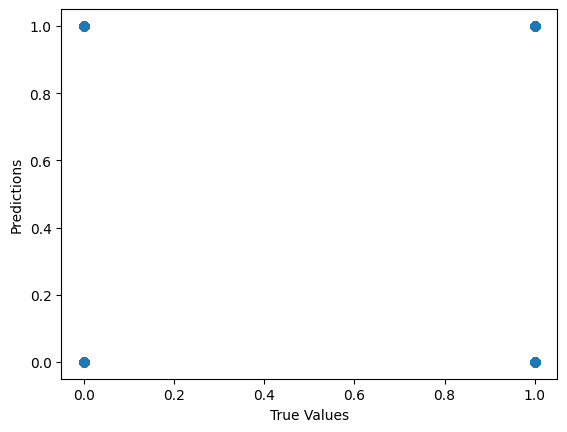

In [31]:
# convert y to another space and plot